Для цієї вправи ми використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на [Kaggle.com](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019). Завантажте файл csv за посиланням і перемістіть його в ту саму директорію, де знаходиться ваш робочий ноутбук (для зручності)

Прочитайте csv файл (використовуйте функцію read_csv)

In [4]:
import pandas as pd

dataframe = pd.read_csv("bestsellers with categories.csv")


Виведіть перші п'ять рядків (використовується функція head)

In [5]:
dataframe.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape).
## Про скільки книг зберігає дані датасет?

In [6]:
dataframe.shape[0]

550

## Відповідь: 550

Для спрощення подальшої роботи давайте трохи підправимо назви змінних

In [7]:
dataframe.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

# Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum).
## Чи є в якихось змінних пропуски? (Так / ні)

In [8]:
dataframe.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

### Відповідь: Ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
## Які є унікальні жанри? - 

In [9]:
dataframe["genre"].nunique()

2

In [10]:
dataframe["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

## Відповідь: 'Non Fiction', 'Fiction'

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

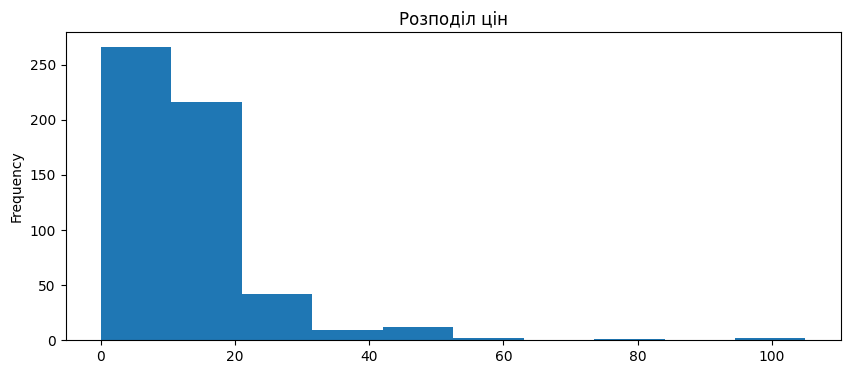

In [11]:
import matplotlib.pyplot as plt
dataframe['price'].plot(kind='hist', title='Розподіл цін', ylabel='Frequency', figsize=(10,4))
plt.show()

In [12]:
# dataframe["price"].max()
# dataframe["price"].min()
# dataframe["price"].mean()
# dataframe["price"].median()

dataframe.agg({"price": ["min", "max", "mean", "median"]})

,price
min,0.0
max,105.0
mean,13.1
median,11.0


## Максимальна ціна? Відповідь: 105
## Мінімальна ціна? Відповідь: 0
## Середня ціна? Відповідь: 13.1
## Медіанна ціна? Відповідь: 11.0

Пошук та сортування даних
## Який рейтинг у датасеті найвищий?

In [13]:
dataframe.agg({"user_rating": ["max"]})

,user_rating
max,4.9


## Відповідь: 4.9

## Скільки книг мають такий рейтинг?

In [14]:
len(dataframe[dataframe["user_rating"] == dataframe["user_rating"].max()]["name"].unique())

28

## Відповідь: 28
## Яка книга має найбільше відгуків?

In [15]:
dataframe[dataframe["reviews"] == dataframe["reviews"].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


## Відповідь: Where the Crawdads Sing
## З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [16]:
year = 2015
dataframe[dataframe["year"] == year].sort_values(by="user_rating", ascending=False)[:50].sort_values(by="price", ascending=False).head(1)

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


## Відповідь: 277	Publication Manual of the American Psychologic...	American Psychological Association
## Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [17]:
year = 2010
dataframe[ (dataframe['year'] == year) & (dataframe['genre'] == "Fiction") ].sort_values(by ="user_rating",ascending=False)[:50].shape[0]

20

## Відповідь: 20
## Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [18]:
raiting = 4.9
years = [2010, 2011]
dataframe[ (dataframe["user_rating"] == raiting) & (dataframe["year"].isin(years))].shape[0]

1

## Відповідь: 1
І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
## Яка книга остання у відсортованому списку?

In [19]:
year = 2015
dataframe[ (dataframe["year"] == year) & (dataframe["price"] < 8) ].sort_values(by="price", ascending=True).tail(1)


,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction



## Відповідь: 253	Old School (Diary of a Wimpy Kid #10)	Jeff Kinney

# Агрегування даних та з'єднання таблиць
Остання секція цього домашнього завдання включає просунутіші функції. Але не хвилюйтеся, pandas робить усі операції простими та зрозумілими.

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [20]:
dataframe[["genre", "price"]].groupby("genre").agg(["min", "max"])

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

## Максимальна ціна для жанру Fiction? Відповідь : 82
## Мінімальна ціна для жанру Fiction? Відповідь : 0
## Максимальна ціна для жанру Non Fiction? Відповідь : 105
## Мінімальна ціна для жанру Non Fiction? Відповідь : 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [21]:
# data_books = dataframe[["name", "author"]]
data_books = dataframe[["name", "author"]].groupby("author").agg(lambda x: len(x.unique())).rename(columns={"name": "count_books"})
data_books

,count_books
author,
Abraham Verghese,1
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,2
William Davis,1
William P. Young,1


## Якої розмірності вийшла таблиця? Відповідь: 248
## Який автор має найбільше книг?

In [22]:
data_books[data_books["count_books"] == data_books["count_books"].max()]

,count_books
author,
Jeff Kinney,12


## Відповідь: Jeff Kinney
## Скільки книг цього автора? Відповідь: 12

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [23]:
data_books_rating = dataframe[["author", "user_rating"]].drop_duplicates().groupby("author").agg({"user_rating": "mean"})
data_books_rating

,user_rating
author,
Abraham Verghese,4.60
Adam Gasiewski,4.40
Adam Mansbach,4.80
Adir Levy,4.80
Admiral William H. McRaven,4.70
...,...
Walter Isaacson,4.55
William Davis,4.40
William P. Young,4.60


## У якого автора середній рейтинг мінімальний?

In [24]:
data_books_rating[data_books_rating["user_rating"] == data_books_rating["user_rating"].min()]

,user_rating
author,
Donna Tartt,3.9


## Відповідь: Donna Tartt
## Який у цього автора середній рейтинг? 
## Відповідь: 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [25]:
data_authors = pd.concat([data_books, data_books_rating], axis=1).sort_values(by=(["count_books", "user_rating"]), ascending=([True, True]))
data_authors

,count_books,user_rating
author,,
Donna Tartt,1,3.90
Gallup,1,4.00
Gillian Flynn,1,4.00
Muriel Barbery,1,4.00
Chris Cleave,1,4.10
...,...,...
Bill O'Reilly,6,4.65
Dav Pilkey,6,4.90
Stephenie Meyer,7,4.65


## Який автор перший у списку?

In [26]:
data_authors.head(1)

,count_books,user_rating
author,,
Donna Tartt,1,3.9


## Відповідь: Donna Tartt

## Візуалізація

In [27]:
%matplotlib inline
import seaborn as sns

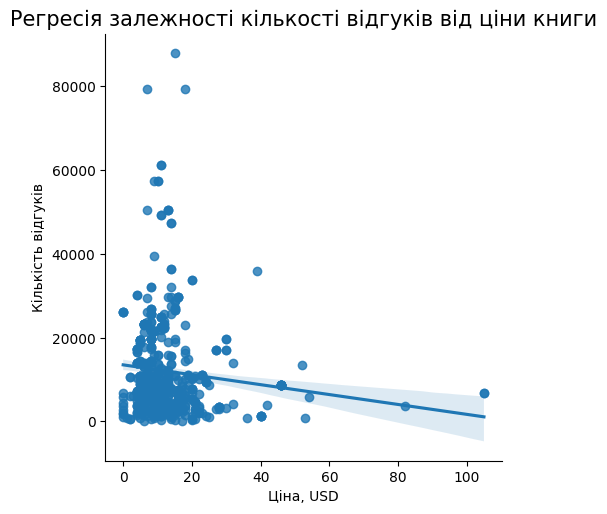

In [29]:
sns.lmplot(x='price', y='reviews', data=dataframe)

plt.xlabel('Ціна, USD')
plt.ylabel('Кількість відгуків')
plt.title('Регресія залежності кількості відгуків від ціни книги', size=15)

plt.show()

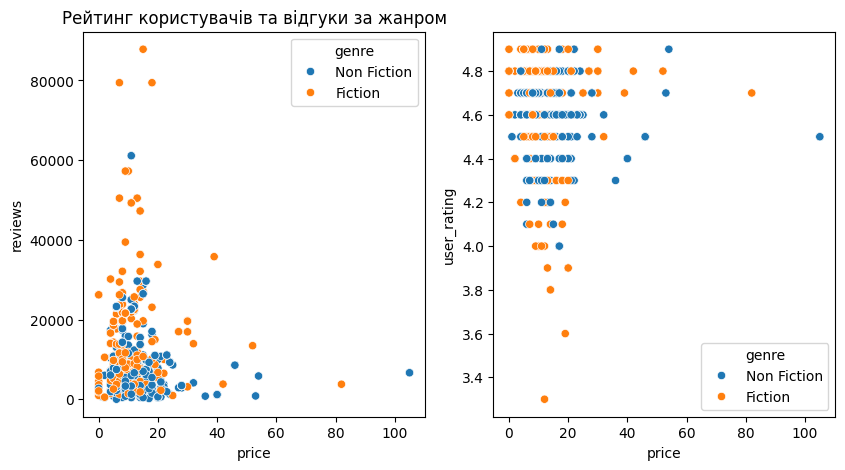

In [33]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='price', y='reviews', hue='genre', data=dataframe)
plt.title('Рейтинг користувачів та відгуки за жанром')
plt.subplot(1, 3, 2)
sns.scatterplot(x='price', y='user_rating', hue='genre', data=dataframe)
plt.show()

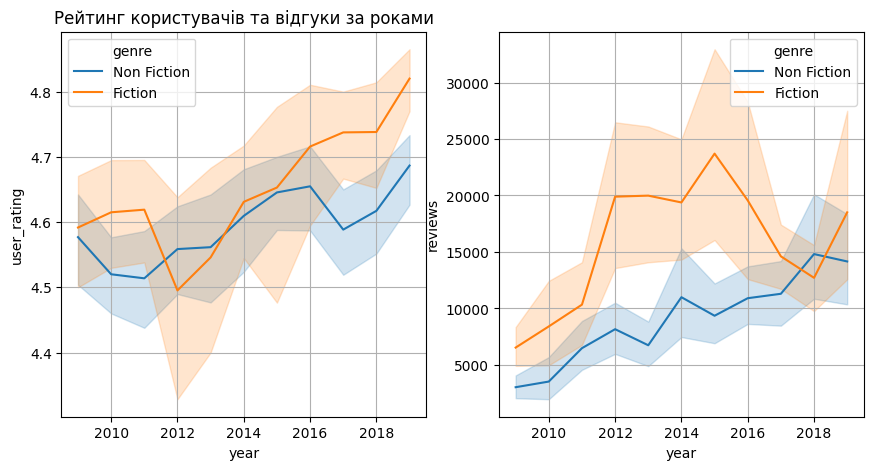

In [58]:
plt.figure(figsize=(16,5))
plt.subplot(1, 3, 1)
plt.title('Рейтинг користувачів та відгуки за роками')
sns.lineplot(x='year', y='user_rating', hue='genre', data=dataframe)
plt.grid()
plt.subplot(1, 3, 2)
sns.lineplot(x="year", y="reviews", hue="genre", data=dataframe)
plt.grid()
plt.show()